<center>
  <h1 style="font-family: Times New Roman; font-size: 60px; color: #0f854c; font-weight: bold;">
    Chatbot in medical health care
  </h1>
</center>


Groupe2:

Ivanov Léa<br>
Falzon Alice<br>
Mugoli Winnie Madeleine<br>
Teber Nour-El Houda<br>
DSSAM Abdelali

this is a notebook that has the process of training and evaluating the models used in the project, the code for using the chatbot is in the other file named  **Medical chatbot**

<span style="font-family: 'Times New Roman'; font-size: 40px; color: white;">
 Importing the libraries
</span>

In [57]:
import re
import pandas as pd
import seaborn as sns
import pyttsx3
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier,_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import csv
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<span style="font-family: 'Times New Roman'; font-size: 40px; color: white;">
 Loading and preparing the dataset
</span>

In [22]:
# Load datasets
training = pd.read_csv('Training.csv')
testing = pd.read_csv('Testing.csv')
testing.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [23]:
# Combine datasets
data = pd.concat([training, testing], ignore_index=True)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
# Separate features and target
cols = data.columns[:-1]  # All columns except the last one (target)
x = data[cols]  
y = data['prognosis']
reduced_data = training.groupby(training['prognosis']).max()

In [223]:
# Encode target variable
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

# Split combined data into new training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# y_train.shape

<span style="font-family: 'Times New Roman'; font-size: 45px; color: white;">
 ____________ Training and testing the models ____________
</span>

# 1. Decision Tree Classifier

In [224]:
clf1  = DecisionTreeClassifier(max_depth=100)
clf = clf1.fit(x_train,y_train)
# Test on the test set
print("=========== Normal Results ===========")
print("Test set score:", round(clf.score(x_test, y_test),2))  # Corrected to y_test

# Cross-validation on the test set
print("=========== Cross Results ===========")
scores = cross_val_score(clf1, x_train, y_train, cv=5)  # Use clf1 (untrained model)
print("Cross-validation scores on the test set:", scores)
print("Mean cross-validation score:", round(scores.mean(),4))

=========== Normal Results ===========
Test set score: 0.93
=========== Cross Results ===========
Cross-validation scores on the test set: [0.93669065 0.92805755 0.94236311 0.92074928 0.93659942]
Mean cross-validation score: 0.9329


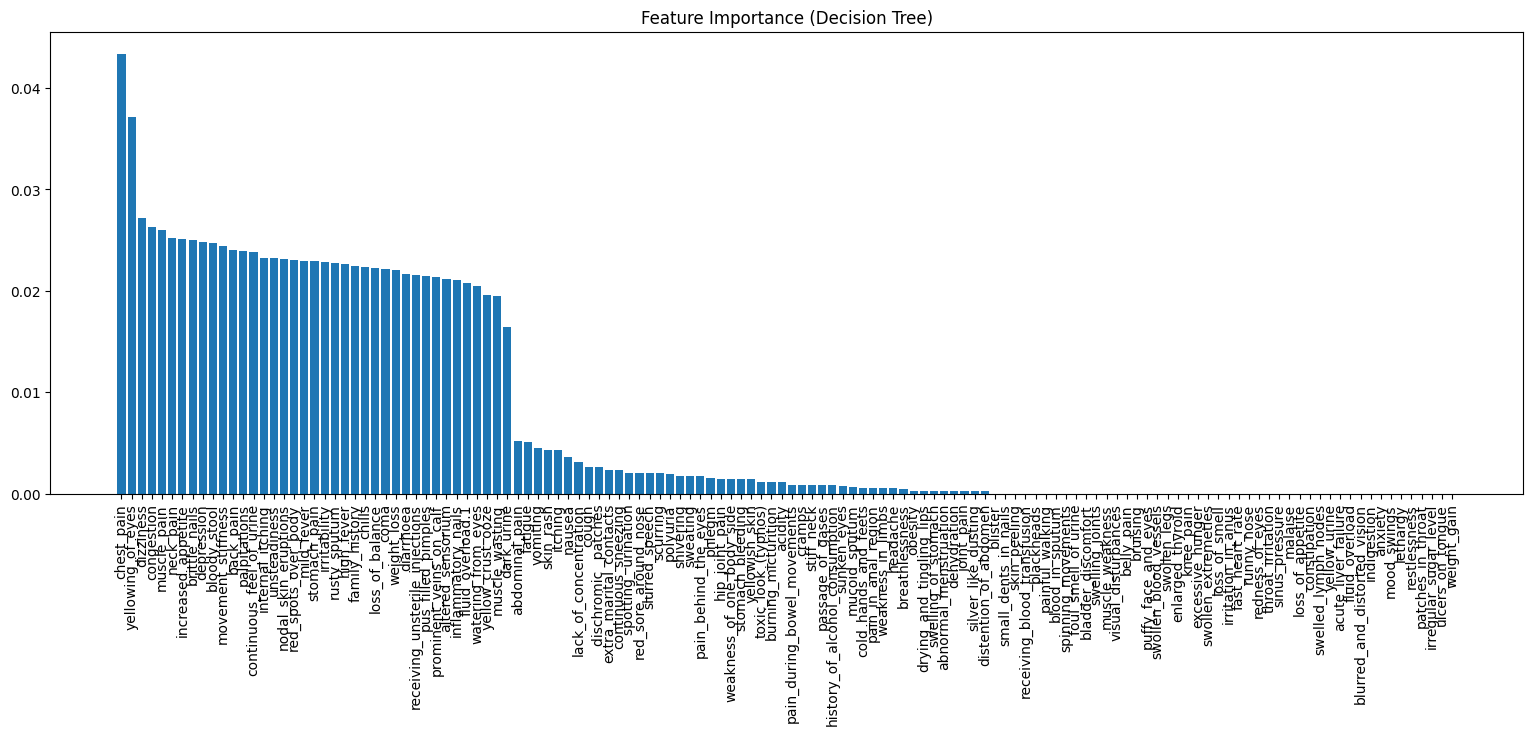

In [217]:
# After training the model, e.g., clf1 for Decision Tree
feature_importances = clf1.feature_importances_
indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(cols)[indices]

# Plotting
plt.figure(figsize=(19, 6))
plt.title("Feature Importance (Decision Tree)")
plt.bar(range(len(indices)), feature_importances[indices], align="center")
plt.xticks(range(len(indices)), sorted_features, rotation=90)
plt.show()


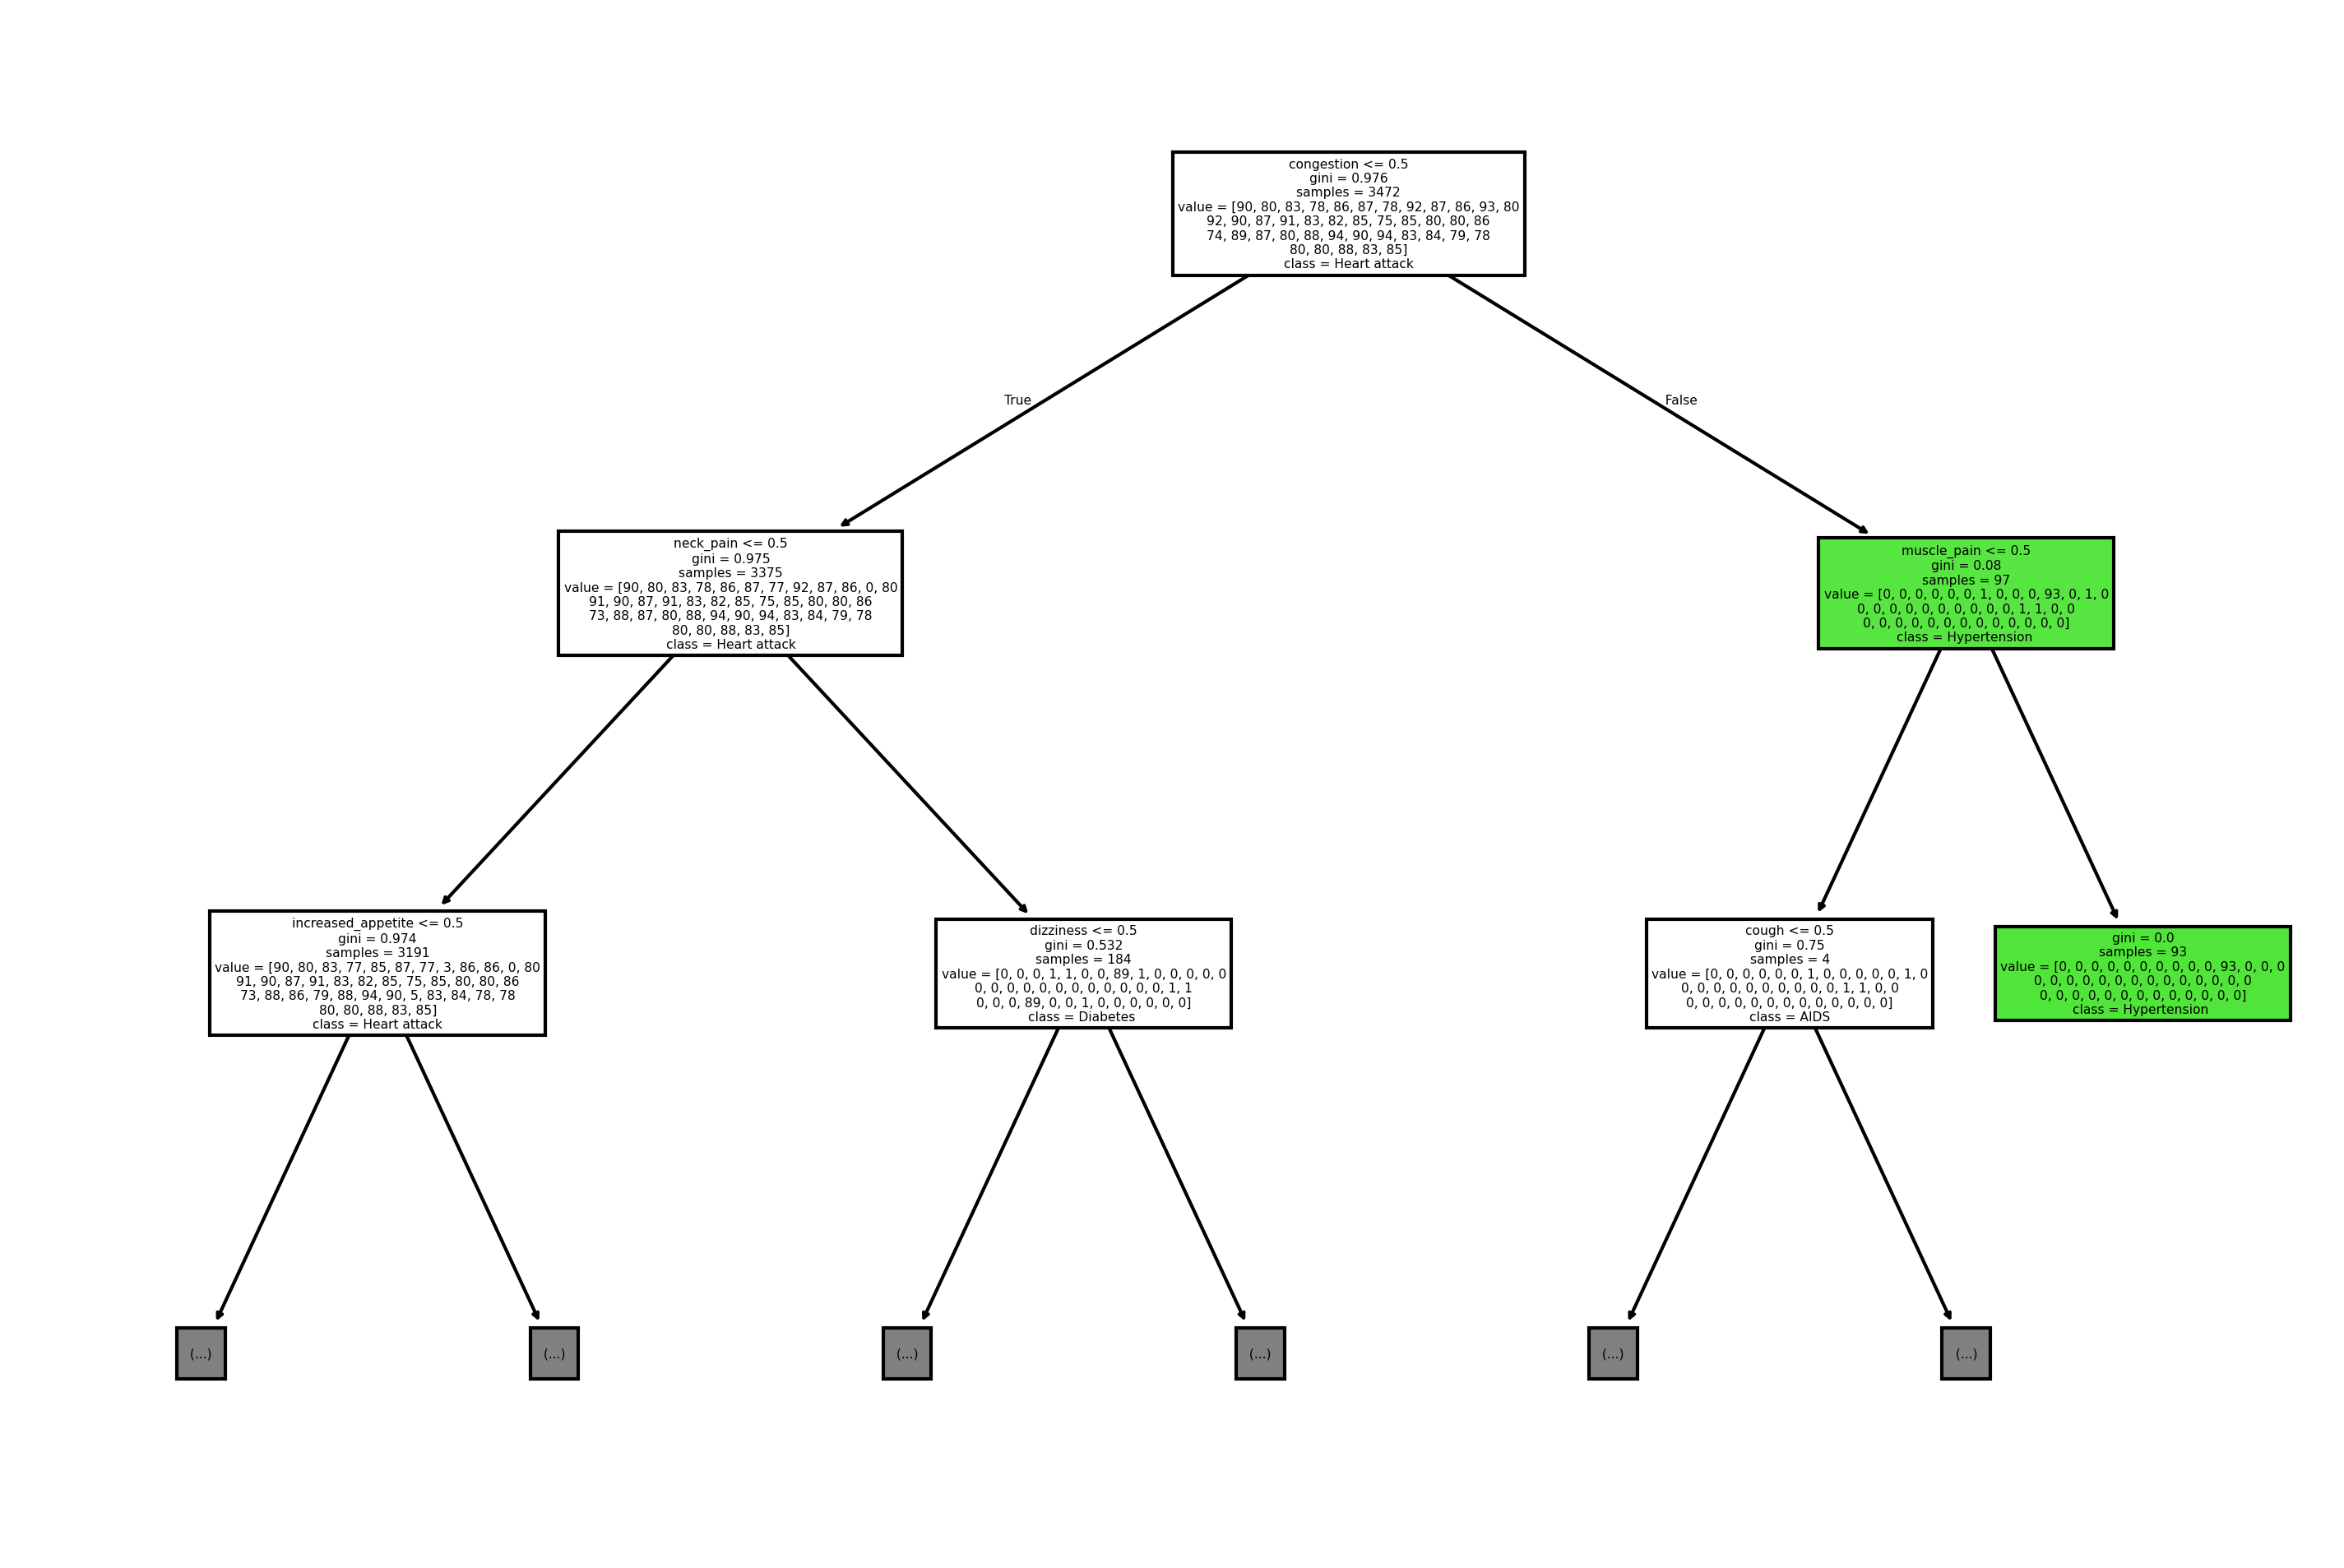

In [220]:
# to get the decision tree ploted
depth = 2           # Change this to plot for another depth 


# Get the class names
class_names = training['prognosis'].unique().tolist()
from sklearn.tree import plot_tree

# Plot only the first 3 levels of the trained decision tree
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(clf, feature_names=cols, class_names=class_names, filled=True, max_depth=depth)
plt.show()

# 2. Support Vector Classifier

In [183]:
# Initialize the model
model = SVC( kernel='rbf') 

# Train and test on the train-test split
print("=========== Normal Results ===========")
tik = time.perf_counter()
sv = model.fit(x_train, y_train) 
tok = time.perf_counter()

# Test on the test set
print("Test set score:", sv.score(x_test, y_test))  # Correctly evaluating on test set
print(f'Fit time: {tok - tik:.3f} seconds')  # Training time

# Cross-validation (only on train set)
print("=========== Cross Results ===========")
tik = time.perf_counter()
scores = cross_val_score(model, x_train, y_train, cv=5)  # Correctly using train set
tok = time.perf_counter()

print(f'CV time: {tok - tik:.3f} seconds')  # Cross-validation time
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", round(scores.mean(), 2))  # CV mean


=========== Normal Results ===========
Test set score: 0.9449294828744124
Fit time: 2.257 seconds
=========== Cross Results ===========
CV time: 11.028 seconds
Cross-validation scores: [0.96115108 0.95971223 0.95533141 0.9610951  0.95677233]
Mean cross-validation score: 0.96


In [184]:
svm_preds = sv.predict(x_test)

svm_accuracy = round(accuracy_score(y_test, svm_preds),2) 
svm_f1_score = round(f1_score(y_test, svm_preds, average='weighted'),2)

print("SVM Accuracy:", svm_accuracy)
print("SVM F1 Score:", svm_f1_score)
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))

SVM Accuracy: 0.94
SVM F1 Score: 0.95
SVM Confusion Matrix:
 [[27  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0 35 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  1  0]
 [ 0  0  0 ...  0 38  0]
 [ 0  0  0 ...  0  0 36]]


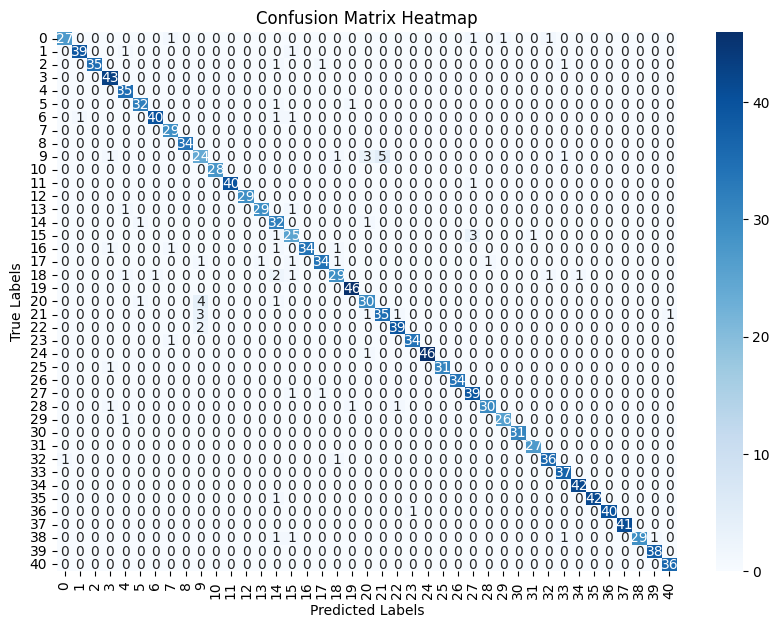

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, svm_preds)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sv.classes_, yticklabels=sv.classes_)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (SVM)')
plt.show()

# 3. Random Forest Classifier

### Looking for the best parameter combination with GridSearch

In [192]:
# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 20, 30, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=1)
grid_search.fit(x_train, y_train)

# Best parameters and training the optimized model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


Random Forest Accuracy: 0.93
Random Forest F1 Score: 0.94
Confusion Matrix:
 [[31  0  0 ...  0  0  0]
 [ 0 33  0 ...  1  0  0]
 [ 0  1 29 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0  0 33]]


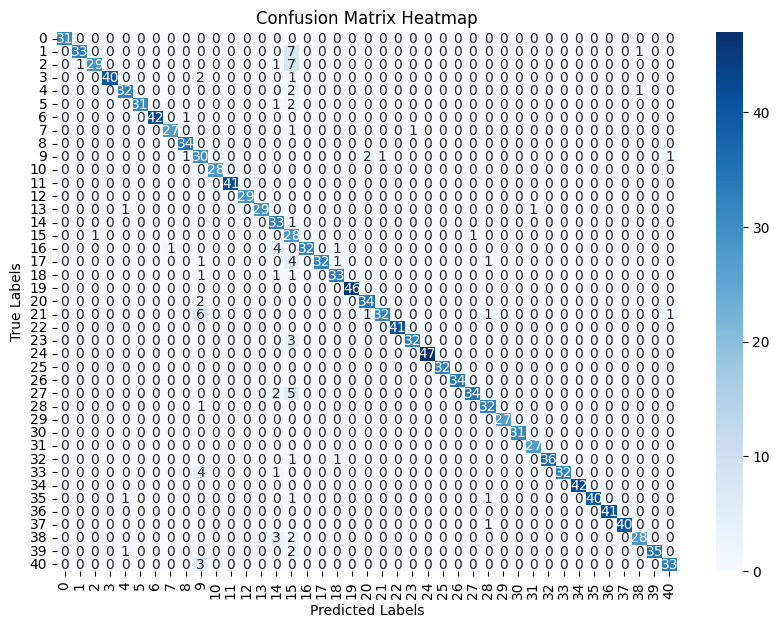

In [193]:
# Train the optimized Random Forest
best_rf.fit(x_train, y_train)

# Predictions and evaluation
rf_preds = best_rf.predict(x_test)

rf_accuracy = round(accuracy_score(y_test, rf_preds),2) 
rf_f1_score = round(f1_score(y_test, rf_preds, average='weighted'),2)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score:", rf_f1_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

# Generate the confusion matrix
cm = confusion_matrix(y_test, rf_preds)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

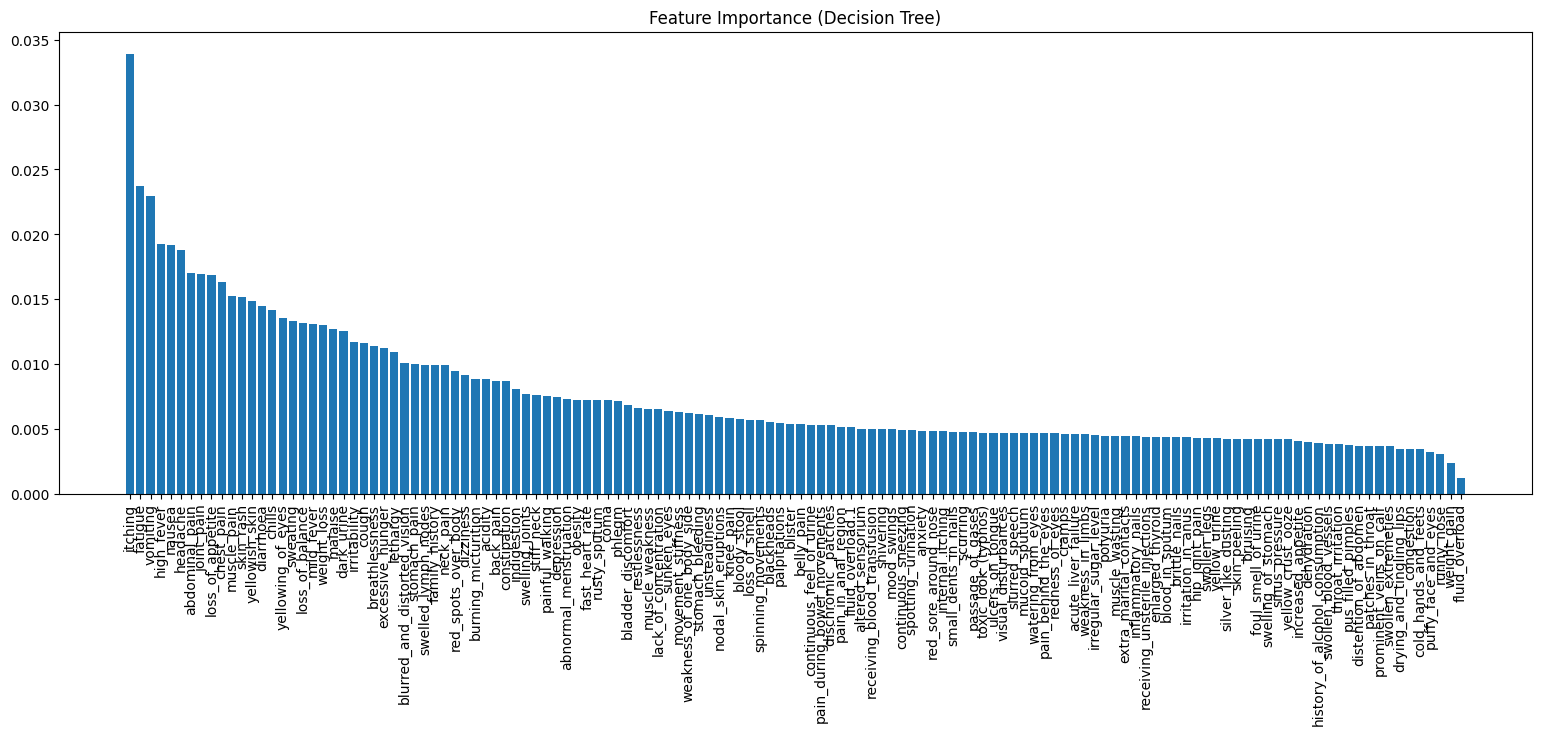

In [ ]:
# After training the model, e.g., clf1 for Decision Tree
feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(cols)[indices]

# Plotting
plt.figure(figsize=(19, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(indices)), feature_importances[indices], align="center")
plt.xticks(range(len(indices)), sorted_features, rotation=90)
plt.show()


# General comparaison

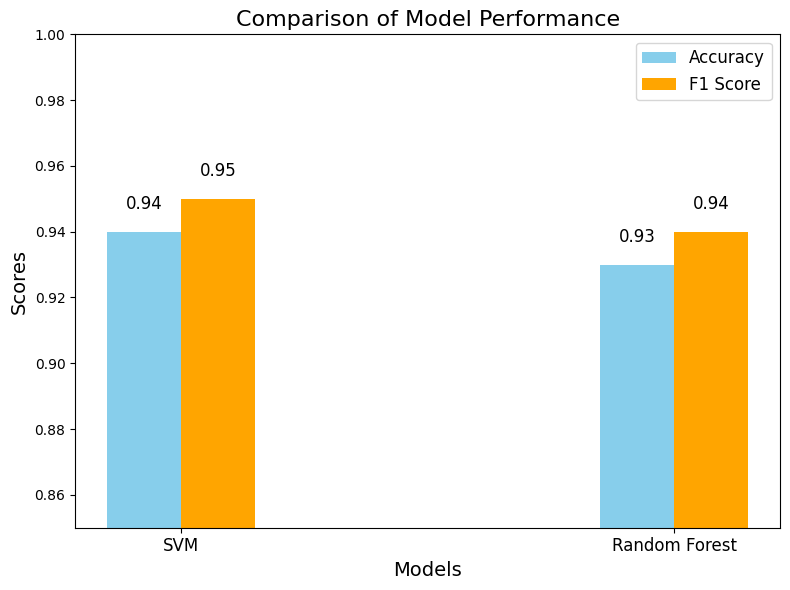

In [229]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# Data for plotting
models = ['SVM', 'Random Forest']
accuracies = [svm_accuracy, rf_accuracy]
f1_scores = [svm_f1_score, rf_f1_score]

# Bar width and positions
bar_width = 0.15
x = np.arange(len(models))

# Plotting the grouped bar chart
plt.figure(figsize=(8, 6))

# Shading the area from 0 to 0.5
plt.axhspan(0, 0.7, facecolor='lightgray', alpha=0.5)

bars_accuracy = plt.bar(x - bar_width/2, accuracies, bar_width, label='Accuracy', color='skyblue')
bars_f1 = plt.bar(x + bar_width/2, f1_scores, bar_width, label='F1 Score', color='orange')

# Adding labels, title, and legend
plt.xlabel('Models', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Comparison of Model Performance', fontsize=16)
plt.xticks(x, models, fontsize=12)
plt.ylim(0.85, 1)  # Scores are between 0 and 1
plt.legend(fontsize=12)

# Adding values on top of each bar
for bar in bars_accuracy:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.007, round(yval, 2), ha='center', fontsize=12)

for bar in bars_f1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.007, round(yval, 2), ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
